written by Konrad, 16-Dec-20

In [1]:
import pandas as pd
import re
from os import path

In [2]:
#load TextComplexityDE dataset
df_all = pd.read_excel(path.join("data", "TextComplexityDE19.xlsx"), sheet_name=2, header=1)
df_all.columns = df_all.columns.str.lower()

In [3]:
#create columns normalized_text and character_count
def remove_numbers(string):
    return re.sub(r'\d', '', string)
def remove_punctuation(string):
    string = re.sub(r'\-', ' ', string) #I'm considering a hyphenated word separated enough to count as 2 words 
    return re.sub(r'[^\w\s]', '', string)
def remove_whitespace(string):
    return re.sub(r'\s+', ' ', string)
def find_longest(list):
    length = 0
    for i in range(len(list)):
        if len(list[i]) > length:
            length = len(list[i])
    return length

df_all['normalized_sentence'] = df_all['sentence'].str.lower()
df_all['normalized_sentence'] = df_all['normalized_sentence'].apply(remove_numbers)
df_all['normalized_sentence'] = df_all['normalized_sentence'].apply(remove_punctuation)
df_all['normalized_sentence'] = df_all['normalized_sentence'].apply(remove_whitespace)
df_all['word_count'] = df_all['normalized_sentence'].str.split().str.len()
df_all['letter_count']  = df_all['normalized_sentence'].str.count(r'\w')
df_all['mean_word_length'] = (df_all['letter_count'] * 1.0) / df_all['word_count']
df_all['max_word_length'] = df_all['normalized_sentence'].str.split().apply(find_longest)

In [4]:
df_all['rmos_r'] = df_all['mos_r'].round().astype('int64')
df_all['rmos_u'] = df_all['mos_u'].round().astype('int64')
df_all['rmos_l'] = df_all['mos_l'].round().astype('int64')

In [5]:
#R Readability/Complexity, U Understandability, L Lexical difficulty
df_all.head()

,id,sentence,article_id,article,votes_r,mos_r,std_r,votes_u,mos_u,std_u,...,mos_l,std_l,normalized_sentence,word_count,letter_count,mean_word_length,max_word_length,rmos_r,rmos_u,rmos_l
0,3,"Etwa 5000 Jahre ist es her, seit die Sumerer d...",1,Seifenblase,9,1.888889,0.781736,9,1.888889,0.781736,...,2.666667,1.000000,etwa jahre ist es her seit die sumerer das sie...,13,56,4.307692,8,2,2,3
1,4,Als Nebenprodukt entstand damals natürlich auc...,1,Seifenblase,10,1.600000,0.699206,9,2.222222,1.301708,...,3.200000,1.475730,als nebenprodukt entstand damals natürlich auc...,9,61,6.777778,12,2,2,3
2,5,"Wegen dieser leichten Vergänglichkeit wurde ,S...",1,Seifenblase,14,4.428571,1.504572,14,4.000000,2.038099,...,4.214286,1.672335,wegen dieser leichten vergänglichkeit wurde se...,20,122,6.100000,15,4,4,4
3,6,Dies spiegelt sich zum Beispiel in der Redewen...,1,Seifenblase,10,3.300000,1.766981,9,2.666667,1.322876,...,3.300000,1.494434,dies spiegelt sich zum beispiel in der redewen...,21,130,6.190476,22,3,3,3
4,7,In der Kunst wird spätestens seit dem Barock d...,1,Seifenblase,9,4.000000,1.870829,9,3.000000,1.936492,...,4.428571,0.975900,in der kunst wird spätestens seit dem barock d...,29,179,6.172414,14,4,3,4


In [6]:
df_wikipedia = df_all[df_all['article_id'] < 24]
df_leichte = df_all[df_all['article_id'] > 23]

print('Sentences sourced from Wikipedia:', df_wikipedia['id'].size)
print('Sentences sourced from Leichte Sprache:', df_leichte['id'].size)

Sentences sourced from Wikipedia: 900
Sentences sourced from Leichte Sprache: 100


sentences rated by score:
1    111
2    257
3    268
4    260
5     83
6     21
Name: rmos_r, dtype: int64


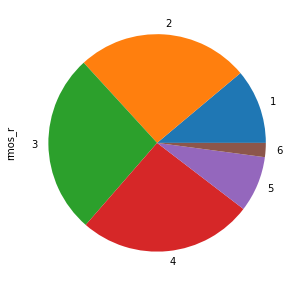

In [7]:
score_counts_r_all = df_all['rmos_r'].value_counts().sort_index()
print("sentences rated by score:")
print(score_counts_r_all)
plot = score_counts_r_all.plot.pie(subplots=True, figsize=(5, 5)) 

In [8]:
print('wikipedia:')
score_counts_r_wikipedia = df_wikipedia['rmos_r'].value_counts().sort_index()
print(score_counts_r_wikipedia)
#plot = score_counts_r_wikipedia.plot.pie(subplots=True, figsize=(5, 5)) 

print('\nleichte sprache:')
score_counts_r_leichte = df_leichte['rmos_r'].value_counts().sort_index()
print(score_counts_r_leichte)
#plot = score_counts_r_leichte.plot.pie(subplots=True, figsize=(5, 5)) 

wikipedia:
1     32
2    237
3    267
4    260
5     83
6     21
Name: rmos_r, dtype: int64

leichte sprache:
1    79
2    20
3     1
Name: rmos_r, dtype: int64


Among the 900 sentences sourced from Wikipedia, there are few that scored a 1 or a 6 in complexity and none(!) that scored a 7.
The 100 sentences sourced from Leichte Sprache are dominated by 1 scores.

In [9]:
print('median complexity score for all sentences:', df_all['mos_r'].median())
print('median complexity score for wikipedia sentences:', df_wikipedia['mos_r'].median())
print('median complexity score for leichte sentences:', df_leichte['mos_r'].median())
print()

print('median understandability score for all sentences:', df_all['mos_u'].median())
print('median understandability score for wikipedia sentences:', df_wikipedia['mos_u'].median())
print('median understandability score for leichte sentences:', df_leichte['mos_u'].median())
print()

print('median lexical difficulty score for all sentences:', df_all['mos_l'].median())
print('median lexical difficulty score for wikipedia sentences:', df_wikipedia['mos_l'].median())
print('median lexical difficulty score for leichte sentences:', df_leichte['mos_l'].median())

median complexity score for all sentences: 3.1
median complexity score for wikipedia sentences: 3.25
median complexity score for leichte sentences: 1.0

median understandability score for all sentences: 2.8819444445
median understandability score for wikipedia sentences: 3.0
median understandability score for leichte sentences: 1.0

median lexical difficulty score for all sentences: 3.4365079365
median lexical difficulty score for wikipedia sentences: 3.6
median lexical difficulty score for leichte sentences: 1.0


In [10]:
import matplotlib.pyplot as plt

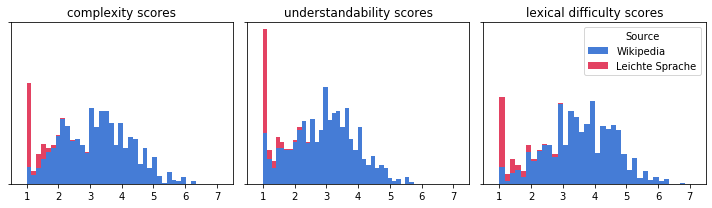

In [11]:
fig = plt.figure(figsize = (10, 3))

plt.subplot(131)
plot_colors = ["#457cd6", "#e34262"]
plt.title(r'complexity scores')
plt.hist([df_wikipedia['mos_r'], df_leichte['mos_r']], 35, stacked=True, density = True, color=plot_colors)
plt.xticks(range(1, 8))
plt.xlim([0.5, 7.5])
plt.ylim([0.0, 0.82]) 
plt.yticks([0.0, 0.82], ['', ''])

plt.subplot(132)
plot_colors = ["#457cd6", "#e34262"]
plt.title(r'understandability scores')
plt.hist([df_wikipedia['mos_u'], df_leichte['mos_u']], 35, stacked=True, density = True, color=plot_colors)
plt.xticks(range(1, 8))
plt.xlim([0.5, 7.5])
plt.ylim([0.0, 0.82]) 
plt.yticks([0.0, 0.82], ['', ''])

plt.subplot(133)
plot_colors = ["#457cd6", "#e34262"]
plt.title(r'lexical difficulty scores')
plt.hist([df_wikipedia['mos_l'], df_leichte['mos_l']], 35, stacked=True, density = True, color=plot_colors, label=["Wikipedia", "Leichte Sprache"])
plt.legend(loc="upper right", title="Source")
plt.xticks(range(1, 8))
plt.xlim([0.5, 7.5])
plt.ylim([0.0, 0.82]) 
plt.yticks([0.0, 0.82], ['', ''])

plt.tight_layout()